<a href="https://colab.research.google.com/github/ruslanTankist/ml_works/blob/main/HW5_Titanic_Models_Comparison/%D0%94%D0%975.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вам необходимо взять ту предобработку данных, которую вы делали для Титаника, отделить 15% test data и обучить на полученных данных модели kNN, логистическую регрессию, SVM, дерево решений, RandomForest, XGBoost, LightGBM и CatBoost (хоть CatBoost и создан не для бинарной классификации). Модели можно и нужно стараться улучшить, используя гиперпараметры модели, регуляризацию итп. Полученные результаты вы сравниваете, используя знания из 5й лекции (оценка моделей). 

Результат работы - визуализация сравнения метрик между моделями.

In [ ]:
from google.colab import files
# files.upload() #kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c titanic

!ls

Saving kaggle.json to kaggle.json
kaggle.json
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 21.4MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.82MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.5MB/s]
gender_submission.csv  kaggle.json  sample_data  test.csv  train.csv


In [ ]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import lightgbm as lgb

!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
df = pd.read_csv("train.csv")
df.fillna(method='backfill', inplace=True)
le = preprocessing.LabelEncoder()
df['Sex'] = list(map(lambda x: str(x), df['Sex']))
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = list(map(lambda x: str(x), df['Embarked']))
df['Embarked'] = le.fit_transform(df['Embarked'])

In [ ]:
X_train = df.iloc[0:757, [2, 4, 5, 6, 7, 9, 11]]
y_train = df.iloc[0:757, 1]
X_test = df.iloc[757:891, [2, 4, 5, 6, 7, 9, 11]]
y_test = df.iloc[757:891, 1]

# kNN

In [ ]:
model_kNN = KNeighborsClassifier(n_neighbors=3)
model_kNN.fit(X_train, y_train)
pred_kNN = model_kNN.predict(X_test)
np.unique([y_test == pred_kNN], return_counts = True)

(array([False,  True]), array([ 28, 106]))

In [ ]:
106/(106+28)

0.7910447761194029

# LogisticRegression

In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
pred_LR = model_LR.predict(X_test)
np.unique([y_test == pred_LR], return_counts = True)

(array([False,  True]), array([ 23, 111]))

In [ ]:
111/(111+23)

0.8283582089552238

# SVM

In [ ]:
model_svc = svm.SVC()
model_svc.fit(X_train, y_train)
pred_svc = model_svc.predict(X_test)
np.unique([y_test == pred_svc], return_counts = True)

(array([False,  True]), array([38, 96]))

In [ ]:
96/(38+96)

0.7164179104477612

# Дерево решений

In [ ]:
model_DT = DecisionTreeClassifier(random_state=0)
model_DT.fit(X_train, y_train)
pred_DT = model_DT.predict(X_test)
np.unique([y_test == pred_DT], return_counts = True)

(array([False,  True]), array([ 25, 109]))

In [ ]:
109/(25+109)

0.8134328358208955

# RandomForest

In [ ]:
model_RF = RandomForestClassifier(max_depth=1, random_state=0)
model_RF.fit(X_train, y_train)
pred_RF = model_RF.predict(X_test)
np.unique([y_test == pred_DT], return_counts = True)

(array([False,  True]), array([ 25, 109]))

In [ ]:
109/(25+109)

0.8134328358208955

# XGBoost

In [ ]:
model_XGB = xgboost.XGBClassifier()
model_XGB.fit(X_train, y_train)
pred_XGB = model_XGB.predict(X_test)
np.unique([y_test == pred_XGB], return_counts = True)

(array([False,  True]), array([ 23, 111]))

In [ ]:
111/(111+23)

0.8283582089552238

# LightGBM

In [ ]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train, y_train)
pred_lgb = model_lgb.predict(X_test)
np.unique([y_test == pred_lgb], return_counts = True)

(array([False,  True]), array([ 19, 115]))

In [ ]:
115/(115+19)

0.8582089552238806

# CatBoost

In [ ]:
model_CB = CatBoostClassifier()
model_CB.fit(X_train, y_train)
pred_CB = model_CB.predict(X_test)
np.unique([y_test == pred_CB], return_counts = True)

Learning rate set to 0.009148
0:	learn: 0.6871508	total: 50.1ms	remaining: 50s
1:	learn: 0.6817451	total: 51.3ms	remaining: 25.6s
2:	learn: 0.6764821	total: 52.5ms	remaining: 17.4s
3:	learn: 0.6706673	total: 54ms	remaining: 13.4s
4:	learn: 0.6657672	total: 55ms	remaining: 10.9s
5:	learn: 0.6607376	total: 56.3ms	remaining: 9.32s
6:	learn: 0.6563557	total: 57.6ms	remaining: 8.17s
7:	learn: 0.6534562	total: 58.4ms	remaining: 7.24s
8:	learn: 0.6488438	total: 59.4ms	remaining: 6.54s
9:	learn: 0.6435713	total: 60.8ms	remaining: 6.02s
10:	learn: 0.6385956	total: 62.1ms	remaining: 5.58s
11:	learn: 0.6336734	total: 63.4ms	remaining: 5.22s
12:	learn: 0.6289203	total: 64.7ms	remaining: 4.91s
13:	learn: 0.6240977	total: 66ms	remaining: 4.65s
14:	learn: 0.6198135	total: 67.1ms	remaining: 4.41s
15:	learn: 0.6165178	total: 68.1ms	remaining: 4.19s
16:	learn: 0.6124575	total: 69.7ms	remaining: 4.03s
17:	learn: 0.6084682	total: 70.9ms	remaining: 3.87s
18:	learn: 0.6043853	total: 72.4ms	remaining: 3.74s


(array([False,  True]), array([ 20, 114]))

In [ ]:
114/(20+114)

0.8507462686567164

# Результаты

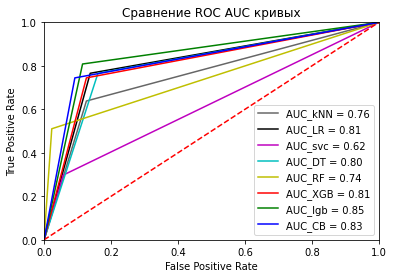

In [ ]:
fpr_kNN, tpr_kNN, threshold_kNN = metrics.roc_curve(y_test, pred_kNN)
roc_auc_kNN = metrics.auc(fpr_kNN, tpr_kNN)

fpr_LR, tpr_LR, threshold_LR = metrics.roc_curve(y_test, pred_LR)
roc_auc_LR = metrics.auc(fpr_LR, tpr_LR)

fpr_svc, tpr_svc, threshold_svc = metrics.roc_curve(y_test, pred_svc)
roc_auc_svc = metrics.auc(fpr_svc, tpr_svc)

fpr_DT, tpr_DT, threshold_DT = metrics.roc_curve(y_test, pred_DT)
roc_auc_DT = metrics.auc(fpr_DT, tpr_DT)

fpr_RF, tpr_RF, threshold_RF = metrics.roc_curve(y_test, pred_RF)
roc_auc_RF = metrics.auc(fpr_RF, tpr_RF)

fpr_XGB, tpr_XGB, threshold_XGB = metrics.roc_curve(y_test, pred_XGB)
roc_auc_XGB = metrics.auc(fpr_XGB, tpr_XGB)

fpr_lgb, tpr_lgb, threshold_lgb = metrics.roc_curve(y_test, pred_lgb)
roc_auc_lgb = metrics.auc(fpr_lgb, tpr_lgb)

fpr_CB, tpr_CB, threshold_CB = metrics.roc_curve(y_test, pred_CB)
roc_auc_CB = metrics.auc(fpr_CB, tpr_CB)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Сравнение ROC AUC кривых')

plt.plot(fpr_kNN, tpr_kNN, '0.4', label = 'AUC_kNN = %0.2f' % roc_auc_kNN)
plt.plot(fpr_LR, tpr_LR, 'k', label = 'AUC_LR = %0.2f' % roc_auc_LR)
plt.plot(fpr_svc, tpr_svc, 'm', label = 'AUC_svc = %0.2f' % roc_auc_svc)
plt.plot(fpr_DT, tpr_DT, 'c', label = 'AUC_DT = %0.2f' % roc_auc_DT)
plt.plot(fpr_RF, tpr_RF, 'y', label = 'AUC_RF = %0.2f' % roc_auc_RF)
plt.plot(fpr_XGB, tpr_XGB, 'r', label = 'AUC_XGB = %0.2f' % roc_auc_XGB)
plt.plot(fpr_lgb, tpr_lgb, 'g', label = 'AUC_lgb = %0.2f' % roc_auc_lgb)
plt.plot(fpr_CB, tpr_CB, 'b', label = 'AUC_CB = %0.2f' % roc_auc_CB)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()